In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('DF.csv', sep=";", index_col=['time'], parse_dates=['time'])
df.head(10)

,speed_gps,spn_5054,spn_917,spn_98
time,,,,
2019-10-26 00:32:42,0,0,0,0
2019-10-26 01:32:41,0,0,0,0
2019-10-26 02:32:41,0,0,0,0
2019-10-26 03:32:41,0,0,0,0
2019-10-26 03:45:13,4,"202,461","371,365","22,4"
2019-10-26 03:45:17,5,"202,461","371,365","22,4"
2019-10-26 03:45:18,4,"202,461","371,365","22,4"
2019-10-26 03:45:19,5,"202,461","371,365","22,4"
2019-10-26 03:45:21,4,"202,461","371,365","22,4"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484649 entries, 2019-10-26 00:32:42 to 2020-01-14 18:51:03
Data columns (total 4 columns):
speed_gps    484649 non-null int64
spn_5054     484649 non-null object
spn_917      484649 non-null object
spn_98       484649 non-null object
dtypes: int64(1), object(3)
memory usage: 12.9+ MB


In [19]:
df['spn_5054'] = df['spn_5054'].str.replace(',','.').astype(np.float64)
df['spn_917'] = df['spn_917'].str.replace(',','.').astype(np.float64)
df['spn_98'] = df['spn_98'].str.replace(',','.').astype(np.float64)

Посмотрим на распределение данных. Отмечается очень высокое максимальное значение по столбцу скорость **124,00**.

Максимальный уровень масла также очень высок - **102,00** при медиане 20,4. Похоже на выброс

In [6]:
df.describe()

,speed_gps,spn_5054,spn_917,spn_98
count,484649.000000,484649.000000,484649.000000,484649.000000
mean,63.947711,210.397074,260.501051,19.258727
std,22.959068,15.402820,157.332036,6.121906
min,0.000000,0.000000,0.000000,0.000000
25%,54.000000,206.724000,122.405000,12.400000
50%,72.000000,210.878000,261.395000,20.400000
75%,79.000000,216.056000,399.020000,24.000000
max,124.000000,221.094000,540.095000,102.000000


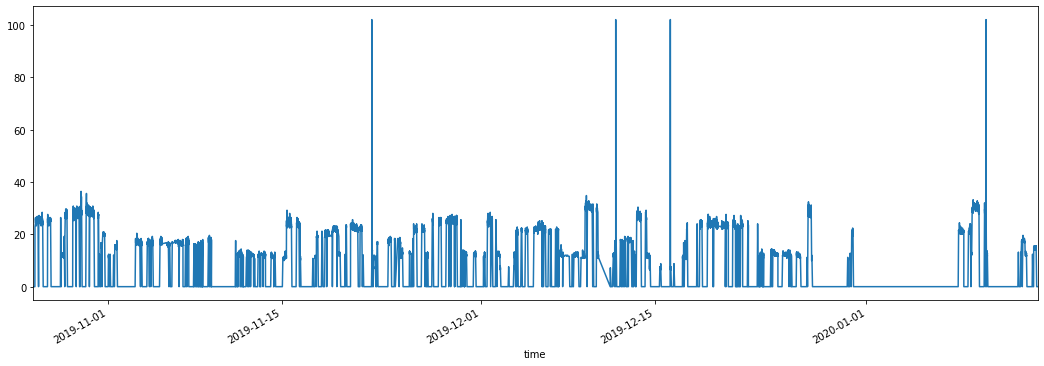

In [7]:
df.spn_98.plot(figsize=(18,6));

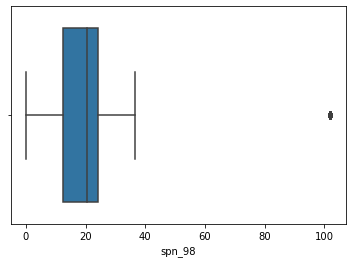

In [11]:
sns.boxplot(x=df["spn_98"]);

Удалим выбросы

In [20]:
df.drop(df[df.spn_98 > 40].index, inplace=True)

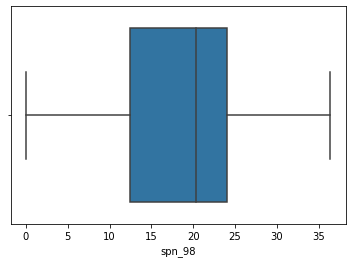

In [13]:
sns.boxplot(x=df["spn_98"]);

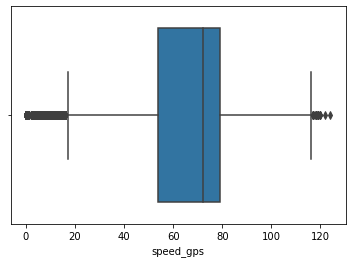

In [27]:
sns.boxplot(x=df["speed_gps"]);

Удалим нулевые значения

In [28]:
df.drop(df[df.speed_gps == 0].index, inplace=True)

Строим линейную регрессию

In [29]:
test_size=0.3
test_index = int(len(df)*(1-test_size))

In [31]:
X_train = df[:test_index].drop(["spn_98"], axis=1)
y_train = df[:test_index]["spn_98"]
X_test = df[test_index:].drop(["spn_98"], axis=1)
y_test = df[test_index:]["spn_98"]

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

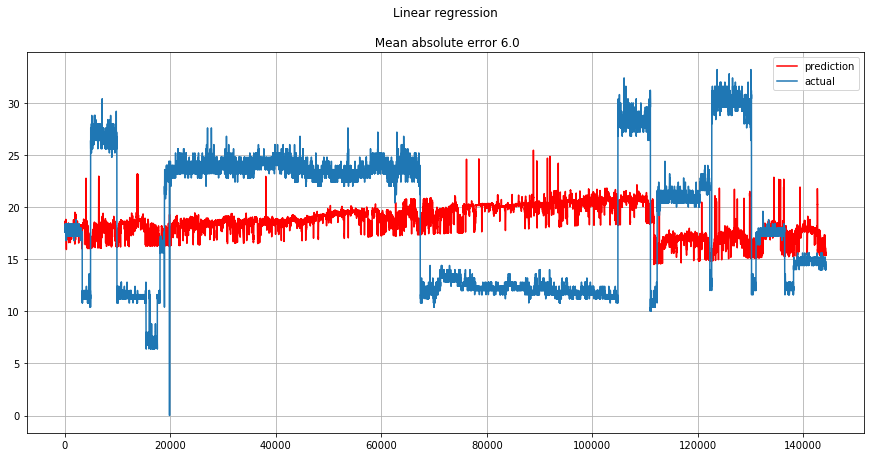

In [34]:
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n\n Mean absolute error {}".format(round(metrics.mean_absolute_error(prediction, y_test))))
plt.grid(True);